# 数据可视化作业题目

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
# 在notebook中显示绘图结果
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib as mpl
from __future__ import division, print_function 

# !pip install seaborn

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
def lineplot(x_data, y_data, x_label, y_label, title, ticklabel):
    # 创建绘图对象
    _, ax = plt.subplots()

    # 绘制拟合曲线，lw=linewidth，alpha=transparancy
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(ticklabel)

In [4]:
data_sumyear=data[['year','passengers']].groupby('year').sum()

In [5]:
data_sumyear

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


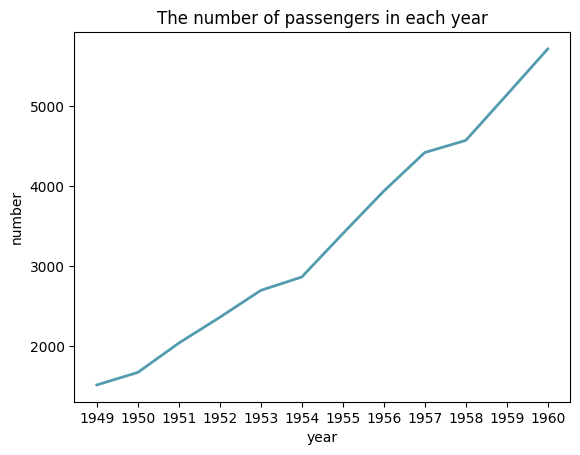

In [6]:
lineplot(x_data=data_sumyear.index.values,y_data=data_sumyear['passengers'],x_label='year',y_label='number',
         title='The number of passengers in each year',ticklabel=data_sumyear.index.values)

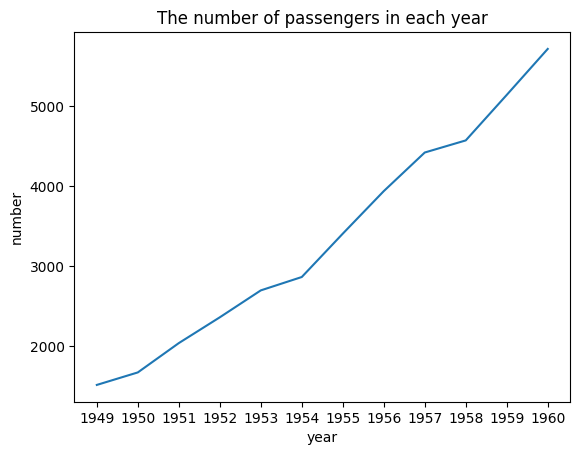

In [6]:
f=sns.lineplot(x="year", y="passengers", data=data_sumyear)
f.set_ylabel('number');
f.set_title('The number of passengers in each year');
f.set_xticks(data_sumyear.index.values);

In [7]:
def barplot(x_data, y_data, x_label, y_label, title, ticklabel):
    _, ax = plt.subplots()
    # 柱状图
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.set_xticks(ticklabel)

In [7]:
data_summonth=data[['month','passengers']].groupby('month').sum()
data_summonth

,passengers
month,
Jan,2901
Feb,2820
Mar,3242
Apr,3205
May,3262
Jun,3740
Jul,4216
Aug,4213
Sep,3629


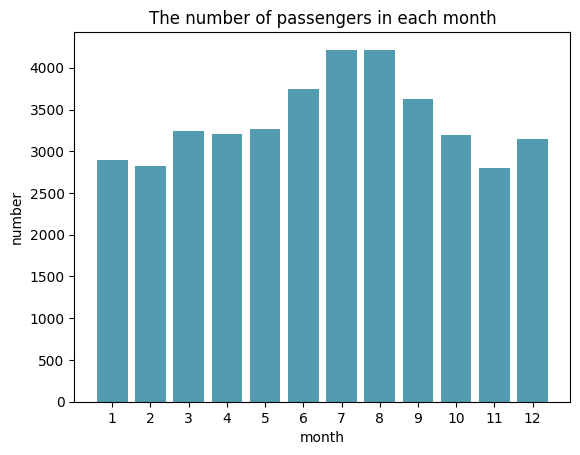

In [9]:
barplot(x_data=np.arange(1,13,1), y_data=data_summonth['passengers'], x_label='month', y_label='number',
        title='The number of passengers in each month',ticklabel=np.arange(1,13,1))

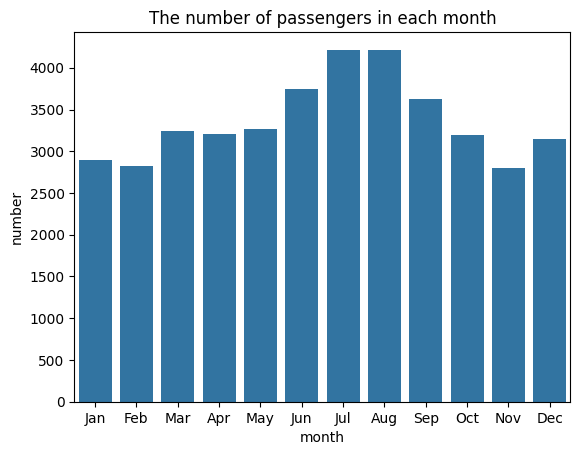

In [8]:
f=sns.barplot(x="month", y="passengers", data=data_summonth)
f.set_ylabel('number');
f.set_title('The number of passengers in each month');

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [9]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


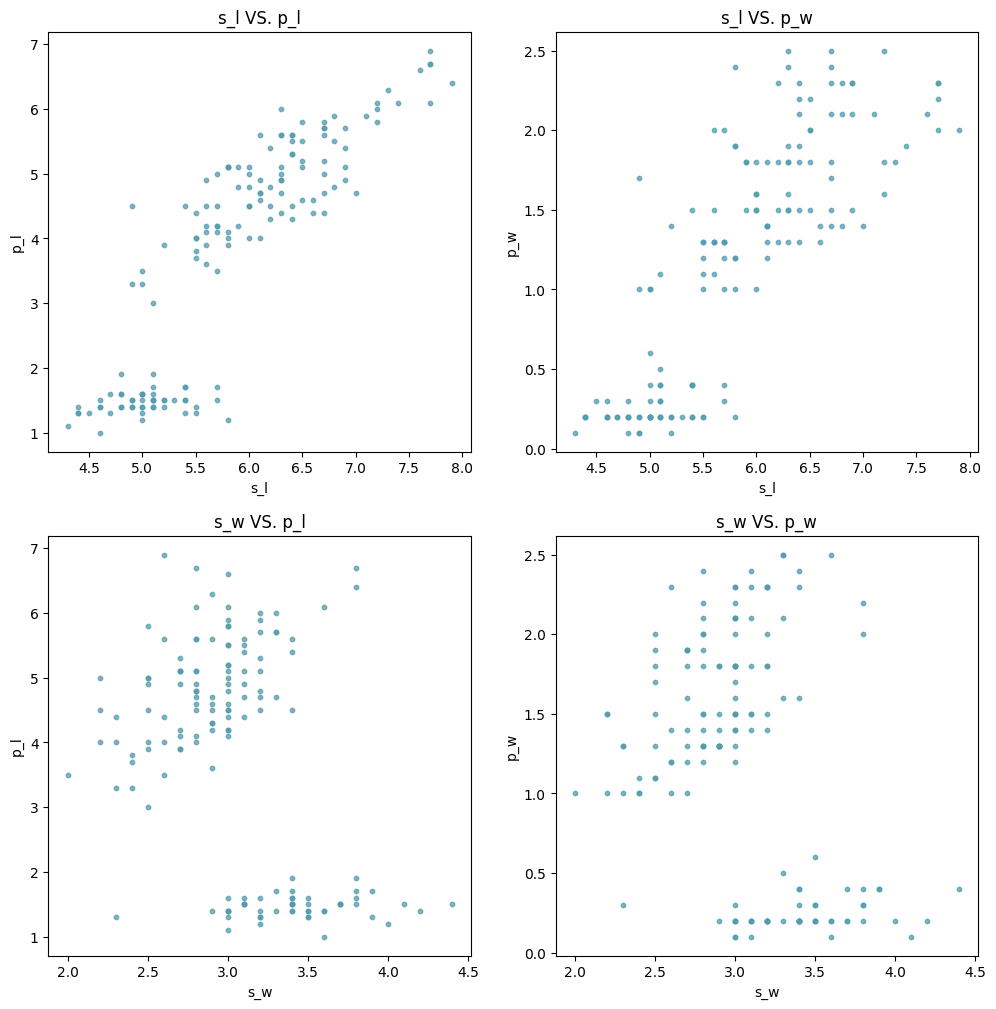

In [11]:
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2, 2, figsize=(12,12))

ax1.scatter(data[['sepal_length']], data[['petal_length']], s = 10, color = '#539caf', alpha = 0.75)
ax1.set_title('s_l VS. p_l')
ax1.set_xlabel('s_l')
ax1.set_ylabel('p_l')

ax2.scatter(data[['sepal_length']], data[['petal_width']], s = 10, color = '#539caf', alpha = 0.75)
ax2.set_title('s_l VS. p_w')
ax2.set_xlabel('s_l')
ax2.set_ylabel('p_w')

ax3.scatter(data[['sepal_width']], data[['petal_length']], s = 10, color = '#539caf', alpha = 0.75)
ax3.set_title('s_w VS. p_l')
ax3.set_xlabel('s_w')
ax3.set_ylabel('p_l')

ax4.scatter(data[['sepal_width']], data[['petal_width']], s = 10, color = '#539caf', alpha = 0.75)
ax4.set_title('s_w VS. p_w')
ax4.set_xlabel('s_w')
ax4.set_ylabel('p_w');

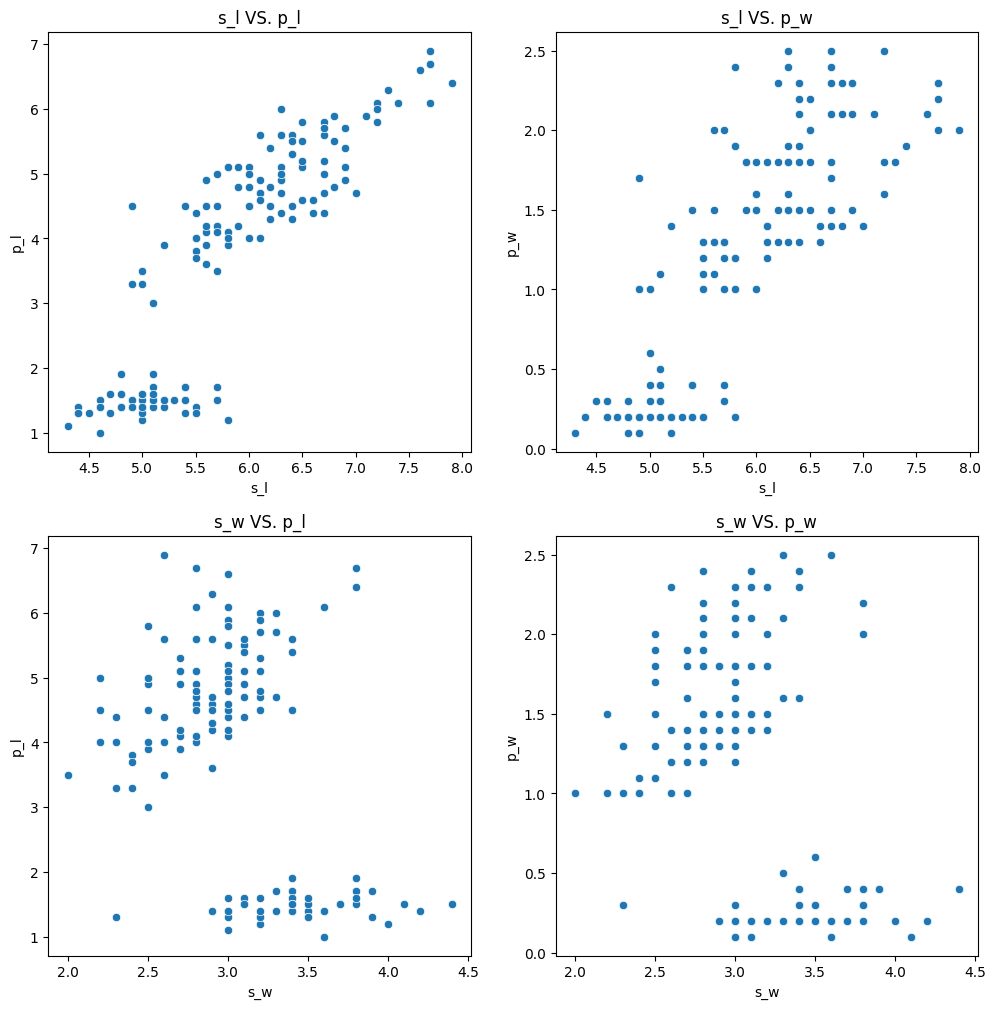

In [10]:
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2, 2, figsize=(12,12))

sns.scatterplot(x='sepal_length', y='petal_length', data=data, ax=ax1)
ax1.set_title('s_l VS. p_l')
ax1.set_xlabel('s_l')
ax1.set_ylabel('p_l')

sns.scatterplot(x='sepal_length', y='petal_width', data=data, ax=ax2)
ax2.set_title('s_l VS. p_w')
ax2.set_xlabel('s_l')
ax2.set_ylabel('p_w')

sns.scatterplot(x='sepal_width', y='petal_length', data=data, ax=ax3)
ax3.set_title('s_w VS. p_l')
ax3.set_xlabel('s_w')
ax3.set_ylabel('p_l')

sns.scatterplot(x='sepal_width', y='petal_width', data=data, ax=ax4)
ax4.set_title('s_w VS. p_w')
ax4.set_xlabel('s_w')
ax4.set_ylabel('p_w');

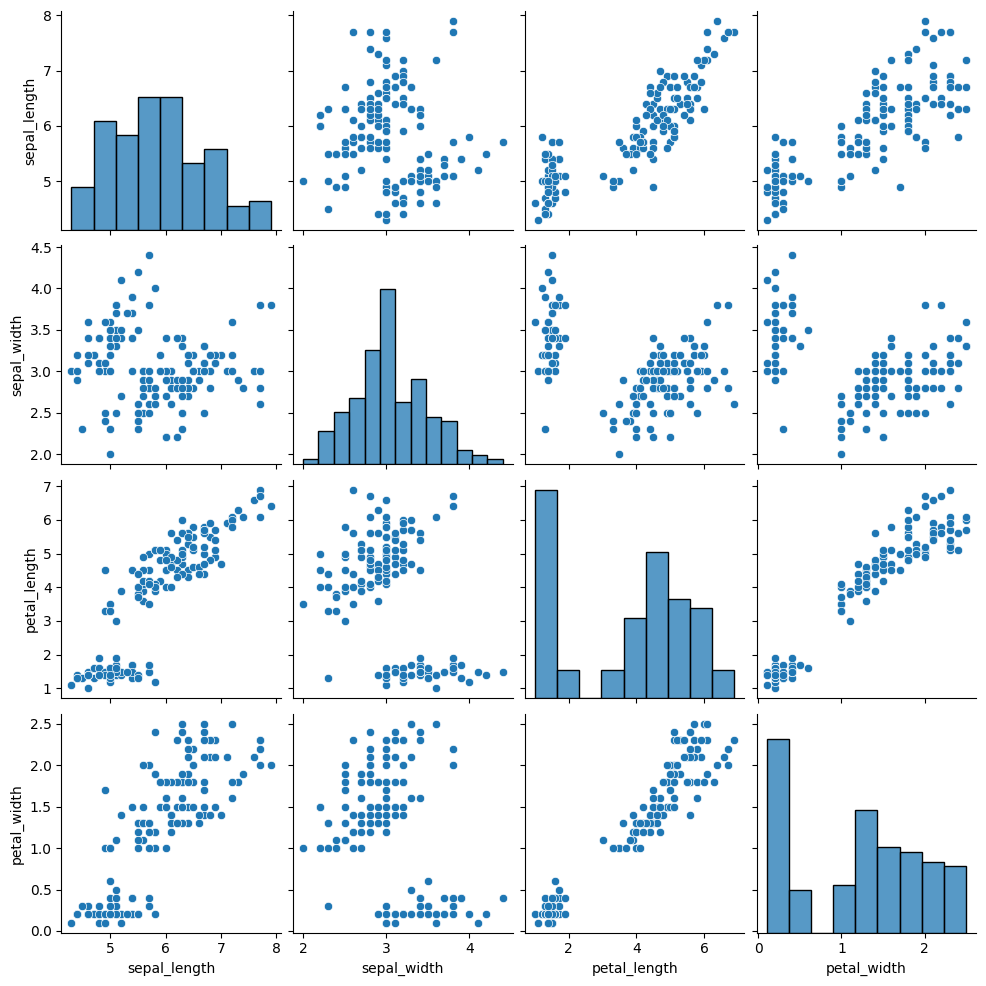

In [12]:
sns.pairplot(data);

In [13]:
data_set=data[data['species']=='setosa']
data_ver=data[data['species']=='versicolor']
data_vir=data[data['species']=='virginica']

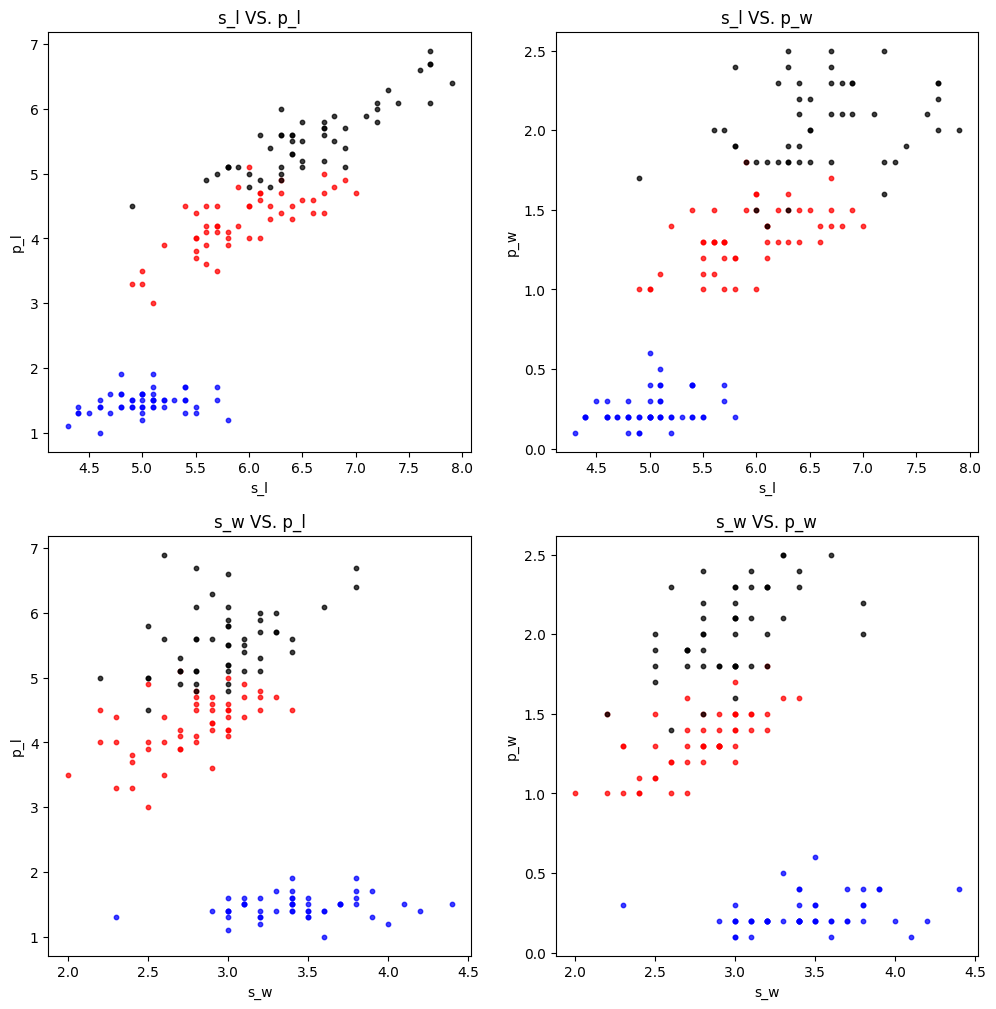

In [14]:
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2, 2, figsize=(12,12))

ax1.scatter(data_set[['sepal_length']], data_set[['petal_length']], s = 10, color = 'b', alpha = 0.75)
ax1.scatter(data_ver[['sepal_length']], data_ver[['petal_length']], s = 10, color = 'r', alpha = 0.75)
ax1.scatter(data_vir[['sepal_length']], data_vir[['petal_length']], s = 10, color = 'k', alpha = 0.75)
ax1.set_title('s_l VS. p_l')
ax1.set_xlabel('s_l')
ax1.set_ylabel('p_l')

ax2.scatter(data_set[['sepal_length']], data_set[['petal_width']], s = 10, color = 'b', alpha = 0.75)
ax2.scatter(data_ver[['sepal_length']], data_ver[['petal_width']], s = 10, color = 'r', alpha = 0.75)
ax2.scatter(data_vir[['sepal_length']], data_vir[['petal_width']], s = 10, color = 'k', alpha = 0.75)
ax2.set_title('s_l VS. p_w')
ax2.set_xlabel('s_l')
ax2.set_ylabel('p_w')

ax3.scatter(data_set[['sepal_width']], data_set[['petal_length']], s = 10, color = 'b', alpha = 0.75)
ax3.scatter(data_ver[['sepal_width']], data_ver[['petal_length']], s = 10, color = 'r', alpha = 0.75)
ax3.scatter(data_vir[['sepal_width']], data_vir[['petal_length']], s = 10, color = 'k', alpha = 0.75)
ax3.set_title('s_w VS. p_l')
ax3.set_xlabel('s_w')
ax3.set_ylabel('p_l')

ax4.scatter(data_set[['sepal_width']], data_set[['petal_width']], s = 10, color = 'b', alpha = 0.75)
ax4.scatter(data_ver[['sepal_width']], data_ver[['petal_width']], s = 10, color = 'r', alpha = 0.75)
ax4.scatter(data_vir[['sepal_width']], data_vir[['petal_width']], s = 10, color = 'k', alpha = 0.75)
ax4.set_title('s_w VS. p_w')
ax4.set_xlabel('s_w')
ax4.set_ylabel('p_w');

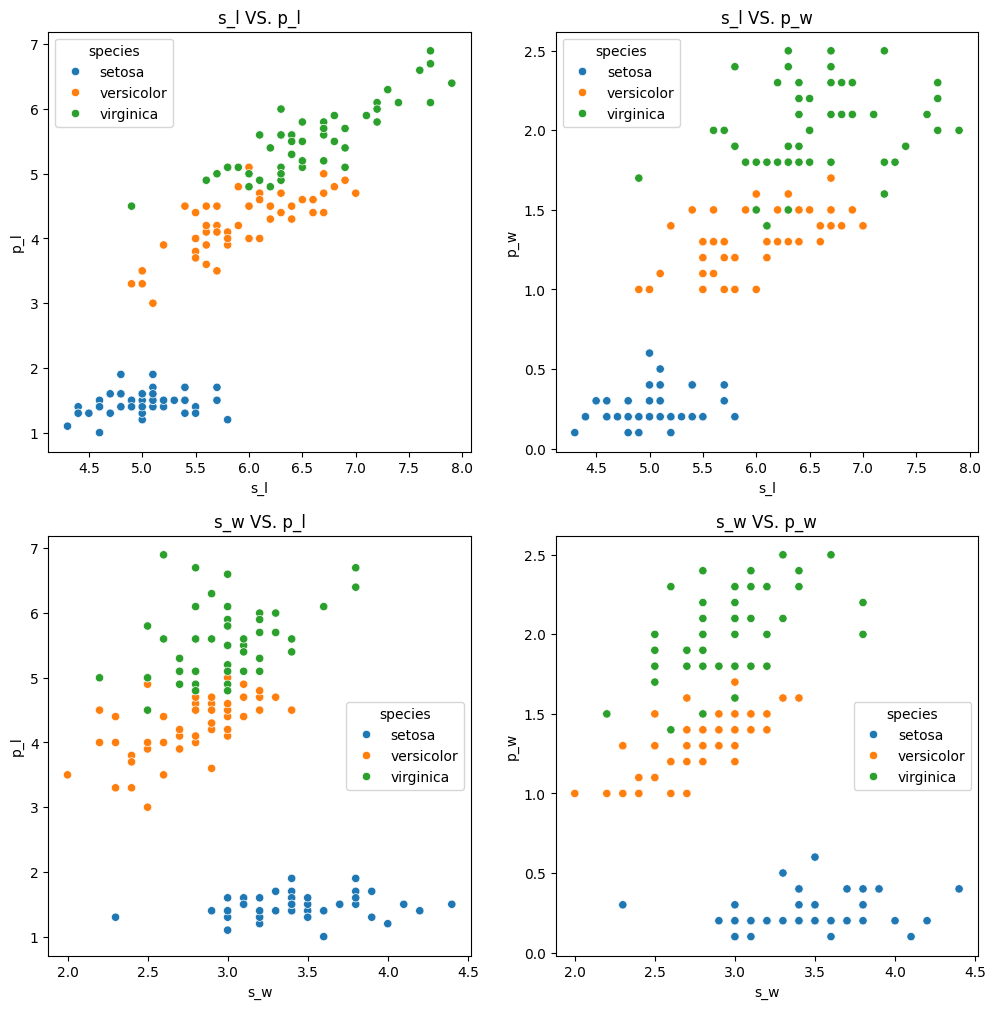

In [15]:
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2, 2, figsize=(12,12))

sns.scatterplot(x='sepal_length', y='petal_length', data=data, ax=ax1, hue='species')
ax1.set_title('s_l VS. p_l')
ax1.set_xlabel('s_l')
ax1.set_ylabel('p_l')

sns.scatterplot(x='sepal_length', y='petal_width', data=data, ax=ax2, hue='species')
ax2.set_title('s_l VS. p_w')
ax2.set_xlabel('s_l')
ax2.set_ylabel('p_w')

sns.scatterplot(x='sepal_width', y='petal_length', data=data, ax=ax3, hue='species')
ax3.set_title('s_w VS. p_l')
ax3.set_xlabel('s_w')
ax3.set_ylabel('p_l')

sns.scatterplot(x='sepal_width', y='petal_width', data=data, ax=ax4, hue='species')
ax4.set_title('s_w VS. p_w')
ax4.set_xlabel('s_w')
ax4.set_ylabel('p_w');

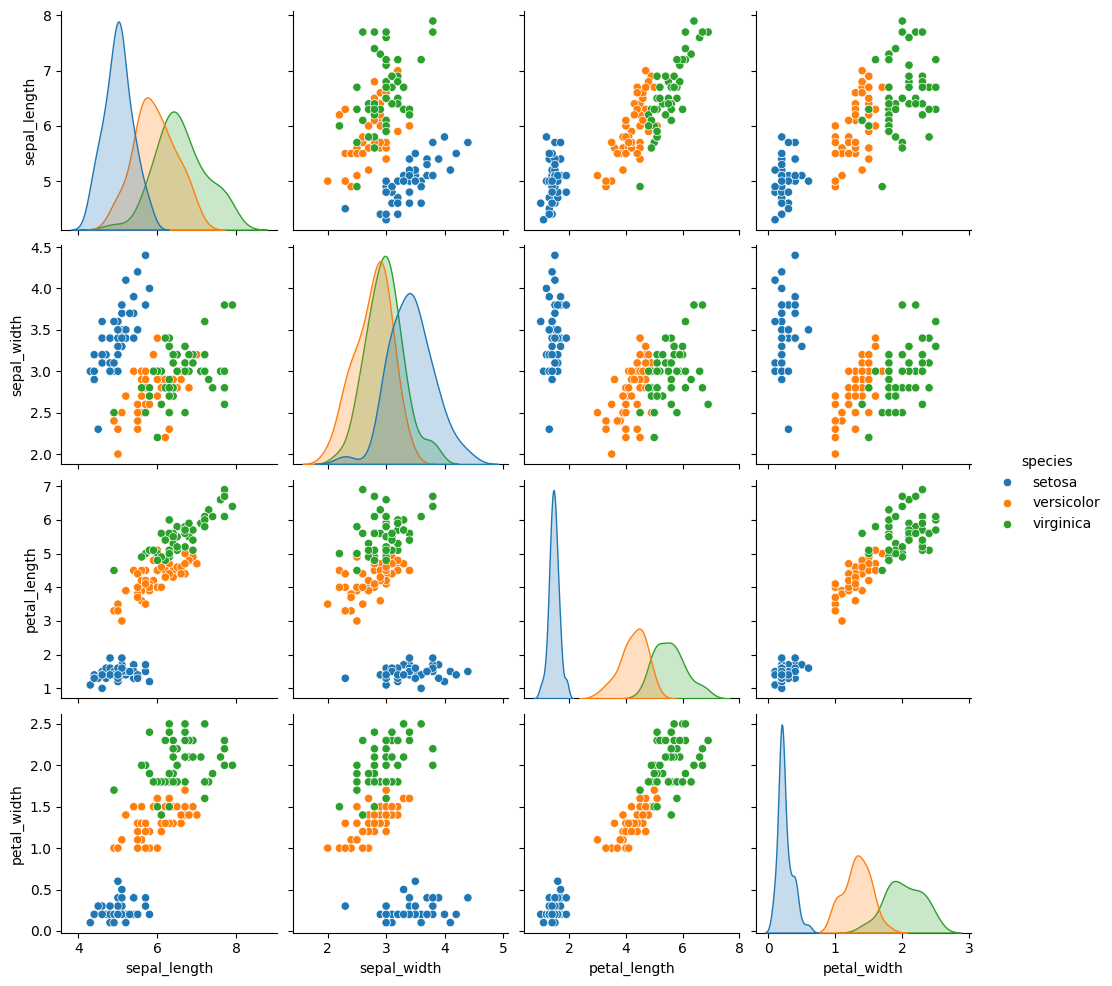

In [16]:
sns.pairplot(data, hue="species");

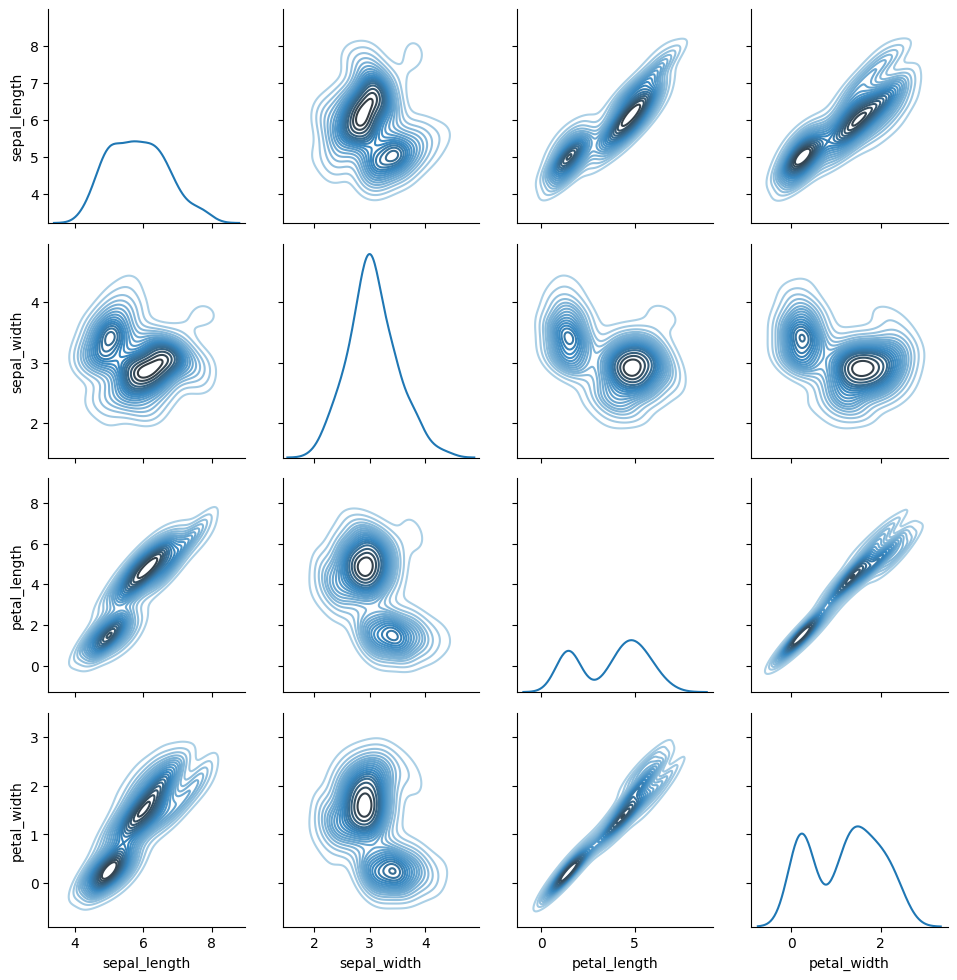

In [17]:
g = sns.PairGrid(data)
g.map_diag(sns.kdeplot) # 对角线单个属性图
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=20); # 非对角线两个属性关系图

In [18]:
data.columns.values[0:4]

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [19]:
paras = data.columns.values[0:4]
set_box = []
for para in paras:
    set_box.append(data_set[[para]].values.flatten())

ver_box = []
for para in paras:
    ver_box.append(data_ver[[para]].values.flatten())

vir_box = []
for para in paras:
    vir_box.append(data_vir[[para]].values.flatten())

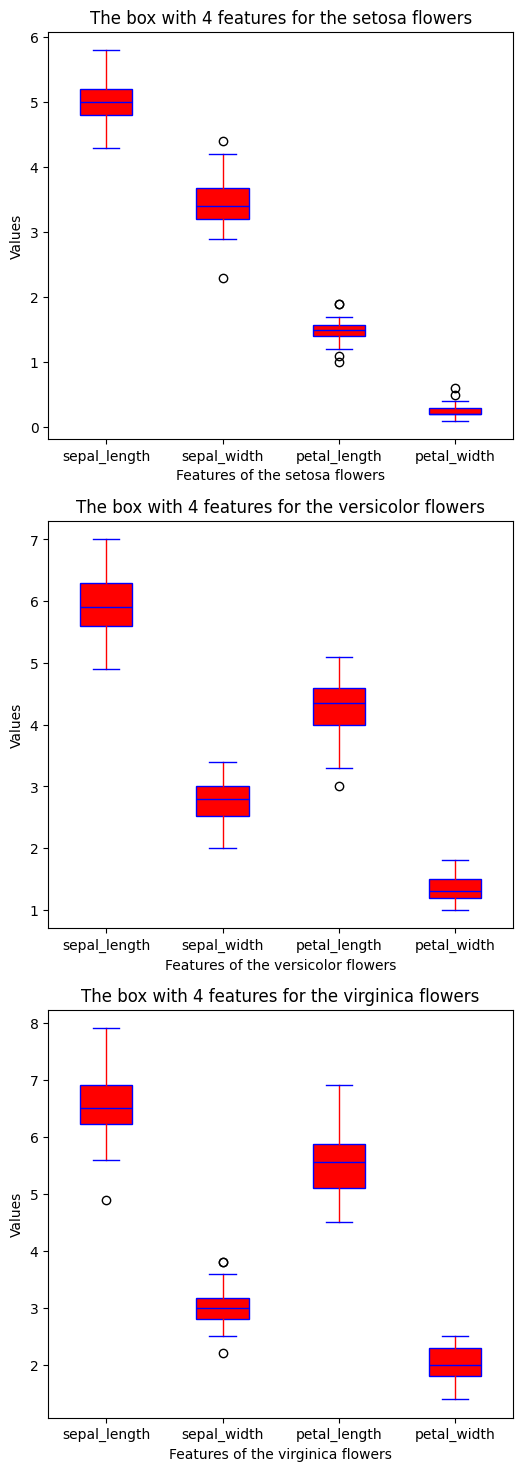

In [20]:
_, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(6,18))

ax1.boxplot(set_box, patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': 'b'}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': 'b', 'facecolor': 'r'}
               # 猫须颜色whisker
               , whiskerprops = {'color': 'r'}
               # 猫须界限颜色whisker cap
               , capprops = {'color': 'b'})

ax1.set_xticklabels(paras)
ax1.set_xlabel('Features of the setosa flowers')
ax1.set_ylabel('Values')
ax1.set_title('The box with 4 features for the setosa flowers')

ax2.boxplot(ver_box
            , patch_artist = True
            , medianprops = {'color': 'b'}
            , boxprops = {'color': 'b', 'facecolor': 'r'}
            , whiskerprops = {'color': 'r'}
               , capprops = {'color': 'b'})

ax2.set_xticklabels(paras)
ax2.set_xlabel('Features of the versicolor flowers')
ax2.set_ylabel('Values')
ax2.set_title('The box with 4 features for the versicolor flowers')

ax3.boxplot(vir_box
            , patch_artist = True
            , medianprops = {'color': 'b'}
            , boxprops = {'color': 'b', 'facecolor': 'r'}
            , whiskerprops = {'color': 'r'}
               , capprops = {'color': 'b'})

ax3.set_xticklabels(paras)
ax3.set_xlabel('Features of the virginica flowers')
ax3.set_ylabel('Values')
ax3.set_title('The box with 4 features for the virginica flowers');

In [21]:
data.melt(id_vars=['species'])

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


<Axes: xlabel='variable', ylabel='value'>

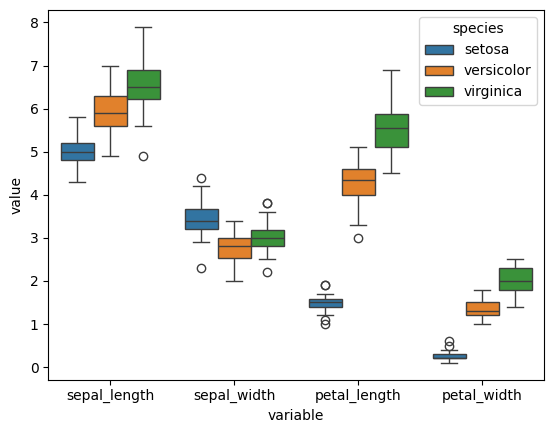

In [22]:
sns.boxplot(x="variable", y="value", data=data.melt(id_vars=['species']), hue="species")

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [23]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
# 线性回归
# !pip install statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
x = sm.add_constant(data['total_bill']) # 线性回归增加常数项
y = data['tip']
regr = sm.OLS(y, x) # 普通最小二乘模型，ordinary least square model
res = regr.fit()

# 从模型获得拟合数据
st, data2, ss2 = summary_table(res, alpha=0.05) # 置信水平alpha=5%，st数据汇总，data数据详情，ss2数据列名
fitted_values = data2[:,2]

In [25]:
def lineplot(x_data, y_data, x_label, y_label, title):
    # 创建绘图对象
    _, ax = plt.subplots()

    # 绘制预测曲线
    ax.plot(x_data, y_data, lw = 1, color = '#539caf', alpha = 1, label = 'Fit')
    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # 显示图例，配合label参数，loc=“best”自适应方式
    ax.legend(loc = 'best')
    return ax

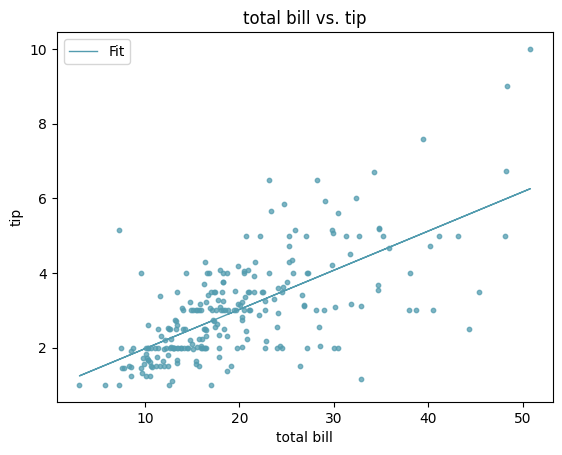

In [26]:
f=lineplot(x_data = data['total_bill']
         , y_data = fitted_values
         , x_label = 'total bill'
         , y_label = 'tip'
         , title = 'total bill vs. tip')
f.scatter(data['total_bill'], data['tip'], s = 10, color = '#539caf', alpha = 0.75);

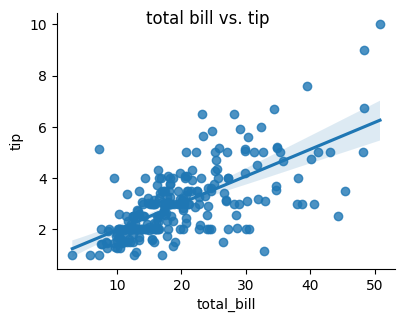

In [27]:
f=sns.lmplot(x="total_bill", y="tip", data=data);
f.fig.set_size_inches(4, 3);
f.fig.suptitle('total bill vs. tip');

In [28]:
paras=data['sex'].unique()
sex_box = []
for para in paras:
    sex_box.append(data[data['sex']==para]['tip'].values.flatten())
sex_box

[array([1.01, 3.61, 5.  , 3.02, 1.67, 3.5 , 2.75, 2.23, 3.  , 3.  , 2.45,
        3.07, 2.6 , 5.2 , 1.5 , 2.47, 1.  , 3.  , 3.14, 5.  , 2.2 , 1.83,
        5.17, 1.  , 4.3 , 3.25, 2.5 , 3.  , 2.5 , 3.48, 4.08, 4.  , 1.  ,
        4.  , 3.5 , 1.5 , 1.8 , 2.92, 1.68, 2.52, 4.2 , 2.  , 2.  , 2.83,
        1.5 , 2.  , 3.25, 1.25, 2.  , 2.  , 2.75, 3.5 , 5.  , 2.3 , 1.5 ,
        1.36, 1.63, 5.14, 3.75, 2.61, 2.  , 3.  , 1.61, 2.  , 4.  , 3.5 ,
        3.5 , 4.19, 5.  , 2.  , 2.01, 2.  , 2.5 , 3.23, 2.23, 2.5 , 6.5 ,
        1.1 , 3.09, 3.48, 3.  , 2.5 , 2.  , 2.88, 4.67, 2.  , 3.  ]),
 array([ 1.66,  3.5 ,  3.31,  4.71,  2.  ,  3.12,  1.96,  3.23,  1.71,
         1.57,  3.  ,  3.92,  3.71,  3.35,  4.08,  7.58,  3.18,  2.34,
         2.  ,  2.  ,  4.3 ,  1.45,  2.5 ,  3.27,  3.6 ,  2.  ,  2.31,
         5.  ,  2.24,  2.54,  3.06,  1.32,  5.6 ,  3.  ,  5.  ,  6.  ,
         2.05,  3.  ,  2.5 ,  1.56,  4.34,  3.51,  3.  ,  1.76,  6.73,
         3.21,  2.  ,  1.98,  3.76,  2.64,  3.15,  2.01, 

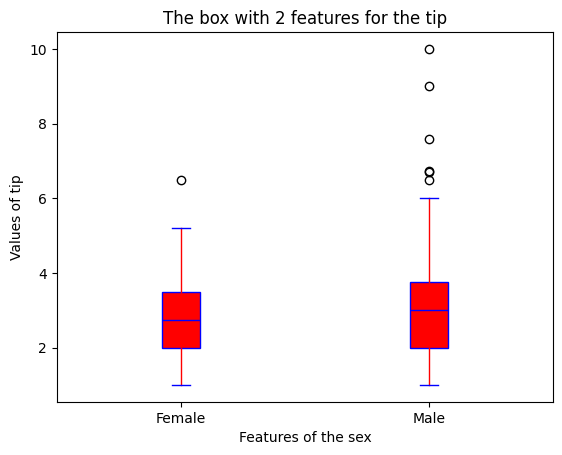

In [29]:
_, ax = plt.subplots()
ax.boxplot(sex_box, patch_artist = True
               , medianprops = {'color': 'b'}
               , boxprops = {'color': 'b', 'facecolor': 'r'}
               , whiskerprops = {'color': 'r'}
               , capprops = {'color': 'b'});
ax.set_xticklabels(paras)
ax.set_xlabel('Features of the sex')
ax.set_ylabel('Values of tip')
ax.set_title('The box with 2 features for the tip');

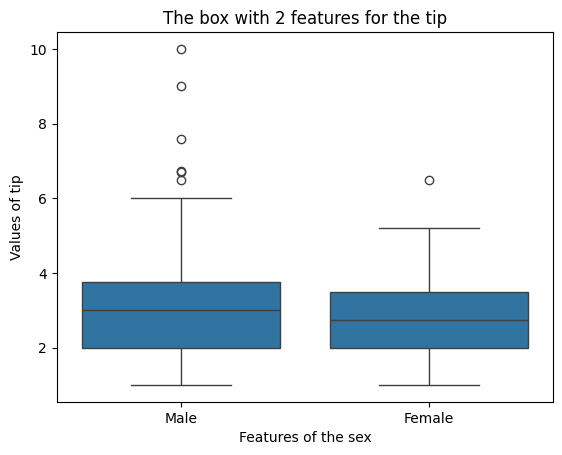

In [30]:
f=sns.boxplot(x="sex", y="tip", data=data);
f.set_xlabel('Features of the sex');
f.set_ylabel('Values of tip');
f.set_title('The box with 2 features for the tip');

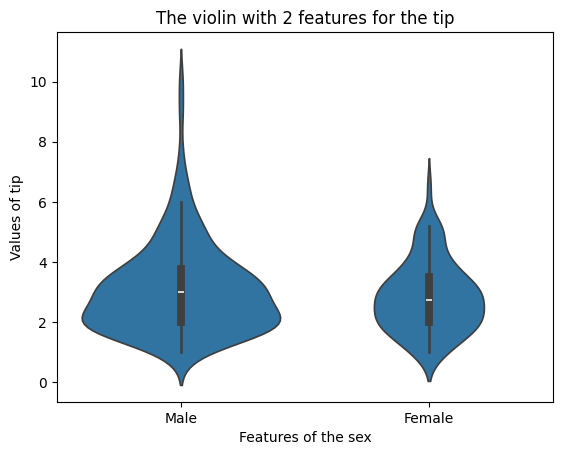

In [31]:
f=sns.violinplot(x="sex", y="tip", scale="count", data=data);
f.set_xlabel('Features of the sex');
f.set_ylabel('Values of tip');
f.set_title('The violin with 2 features for the tip');

In [32]:
paras=data['smoker'].unique()
smoker_box = []
for para in paras:
    smoker_box.append(data[data['smoker']==para]['tip'].values.flatten())
smoker_box

[array([1.01, 1.66, 3.5 , 3.31, 3.61, 4.71, 2.  , 3.12, 1.96, 3.23, 1.71,
        5.  , 1.57, 3.  , 3.02, 3.92, 1.67, 3.71, 3.5 , 3.35, 4.08, 2.75,
        2.23, 7.58, 3.18, 2.34, 2.  , 2.  , 4.3 , 3.  , 1.45, 2.5 , 3.  ,
        2.45, 3.27, 3.6 , 2.  , 3.07, 2.31, 5.  , 2.24, 2.54, 3.06, 1.32,
        5.6 , 3.  , 5.  , 6.  , 2.05, 3.  , 2.5 , 2.6 , 5.2 , 1.56, 4.34,
        3.51, 1.5 , 6.73, 2.64, 3.15, 2.47, 2.01, 1.97, 3.  , 2.2 , 1.25,
        4.  , 3.  , 2.71, 3.4 , 1.83, 2.03, 5.17, 2.  , 4.  , 5.85, 3.  ,
        3.5 , 3.25, 1.5 , 4.08, 3.76, 3.  , 1.  , 4.  , 2.55, 4.  , 3.5 ,
        5.07, 1.5 , 1.8 , 2.92, 2.31, 1.68, 2.5 , 2.  , 2.52, 4.2 , 1.48,
        2.  , 2.  , 2.18, 1.5 , 2.83, 1.5 , 2.  , 3.25, 1.25, 2.  , 2.  ,
        2.75, 3.5 , 6.7 , 5.  , 5.  , 2.3 , 1.5 , 1.36, 1.63, 1.73, 2.  ,
        2.5 , 2.  , 2.74, 2.  , 2.  , 5.14, 5.  , 3.75, 2.61, 2.  , 3.5 ,
        2.5 , 2.  , 2.  , 3.48, 2.24, 4.5 , 5.  , 1.44, 9.  , 3.  , 3.  ,
        2.72, 3.39, 1.47, 1.25, 4.67, 

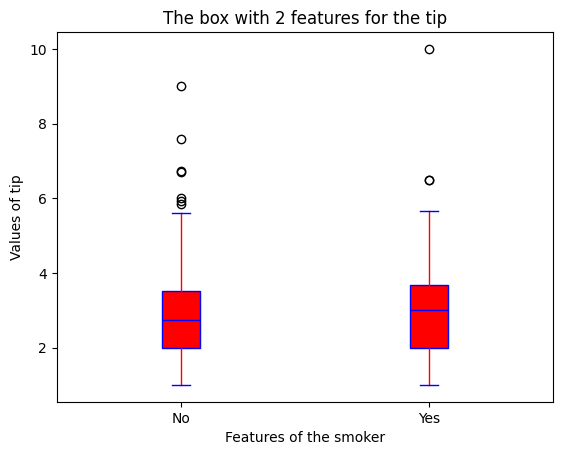

In [33]:
_, ax = plt.subplots()
ax.boxplot(smoker_box, patch_artist = True
               , medianprops = {'color': 'b'}
               , boxprops = {'color': 'b', 'facecolor': 'r'}
               , whiskerprops = {'color': 'r'}
               , capprops = {'color': 'b'});
ax.set_xticklabels(paras)
ax.set_xlabel('Features of the smoker')
ax.set_ylabel('Values of tip')
ax.set_title('The box with 2 features for the tip');

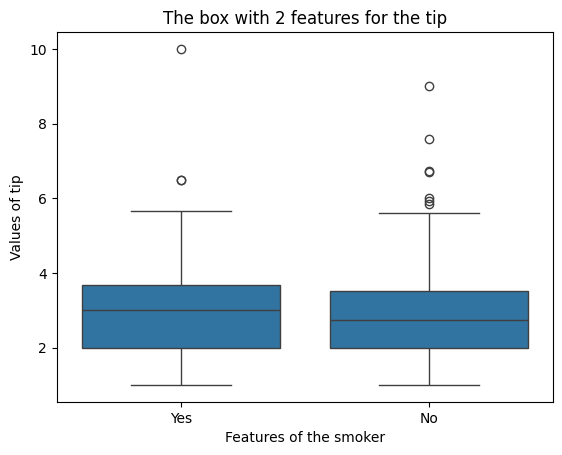

In [34]:
f=sns.boxplot(x="smoker", y="tip", data=data);
f.set_xlabel('Features of the smoker');
f.set_ylabel('Values of tip');
f.set_title('The box with 2 features for the tip');

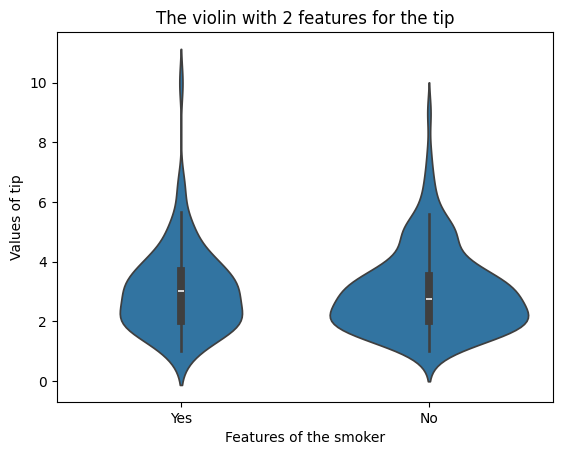

In [35]:
f=sns.violinplot(x="smoker", y="tip", scale="count", data=data);
f.set_xlabel('Features of the smoker');
f.set_ylabel('Values of tip');
f.set_title('The violin with 2 features for the tip');

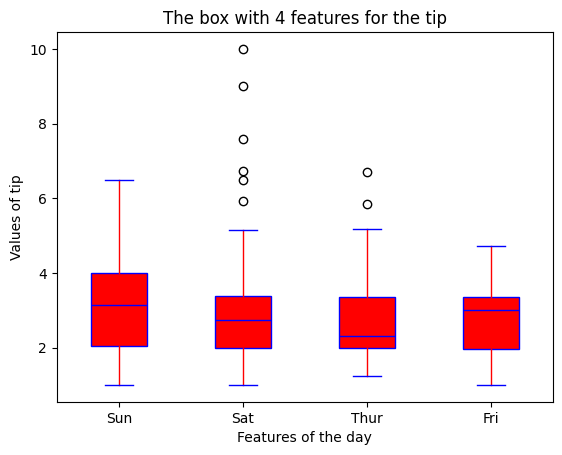

In [36]:
paras=data['day'].unique()
smoker_box = []
for para in paras:
    smoker_box.append(data[data['day']==para]['tip'].values.flatten())

_, ax = plt.subplots()
ax.boxplot(smoker_box, patch_artist = True
               , medianprops = {'color': 'b'}
               , boxprops = {'color': 'b', 'facecolor': 'r'}
               , whiskerprops = {'color': 'r'}
               , capprops = {'color': 'b'});
ax.set_xticklabels(paras)
ax.set_xlabel('Features of the day')
ax.set_ylabel('Values of tip')
ax.set_title('The box with 4 features for the tip');

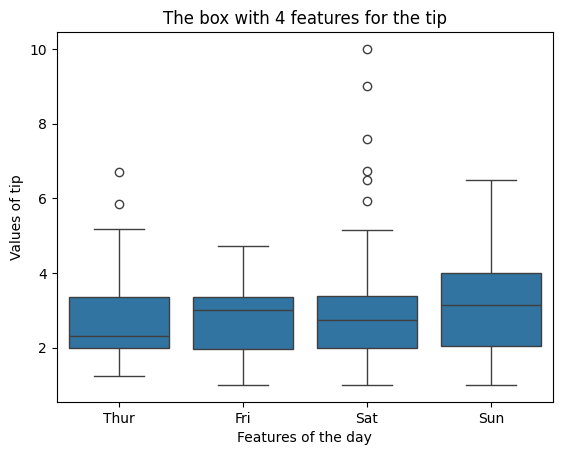

In [37]:
f=sns.boxplot(x="day", y="tip", data=data);
f.set_xlabel('Features of the day');
f.set_ylabel('Values of tip');
f.set_title('The box with 4 features for the tip');

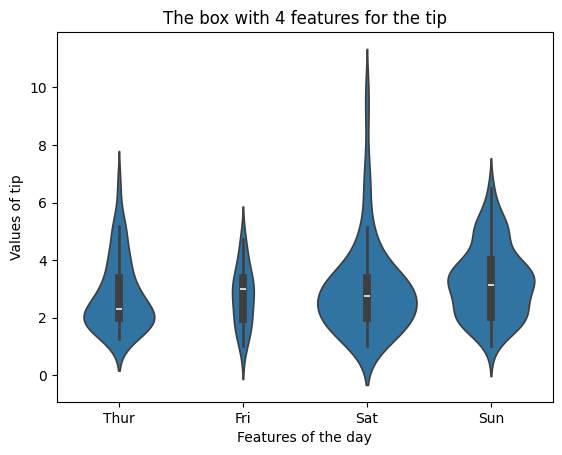

In [38]:
f=sns.violinplot(x="day", y="tip", scale="count", data=data);
f.set_xlabel('Features of the day');
f.set_ylabel('Values of tip');
f.set_title('The box with 4 features for the tip');

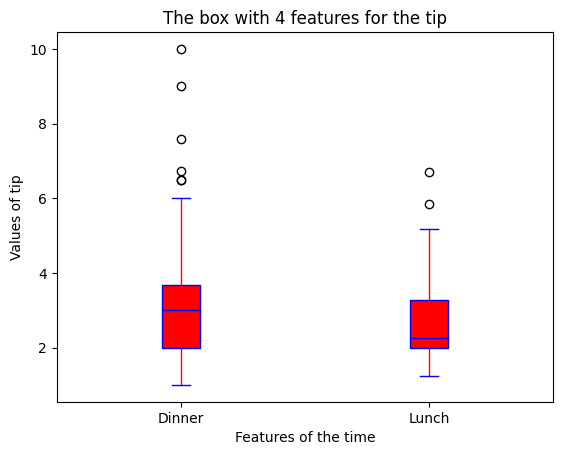

In [39]:
paras=data['time'].unique()
smoker_box = []
for para in paras:
    smoker_box.append(data[data['time']==para]['tip'].values.flatten())

_, ax = plt.subplots()
ax.boxplot(smoker_box, patch_artist = True
               , medianprops = {'color': 'b'}
               , boxprops = {'color': 'b', 'facecolor': 'r'}
               , whiskerprops = {'color': 'r'}
               , capprops = {'color': 'b'});
ax.set_xticklabels(paras)
ax.set_xlabel('Features of the time')
ax.set_ylabel('Values of tip')
ax.set_title('The box with 4 features for the tip');

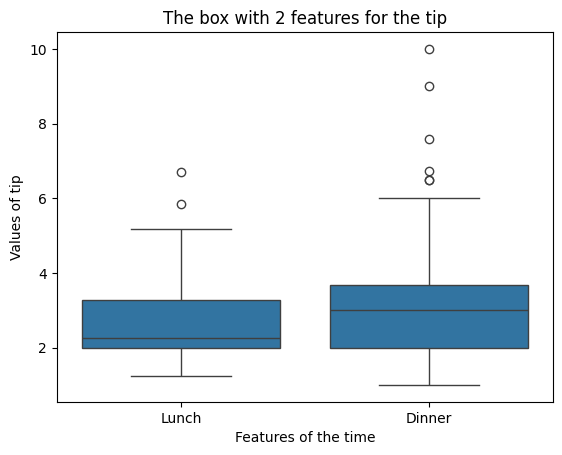

In [40]:
f=sns.boxplot(x="time", y="tip", data=data);
f.set_xlabel('Features of the time');
f.set_ylabel('Values of tip');
f.set_title('The box with 2 features for the tip');

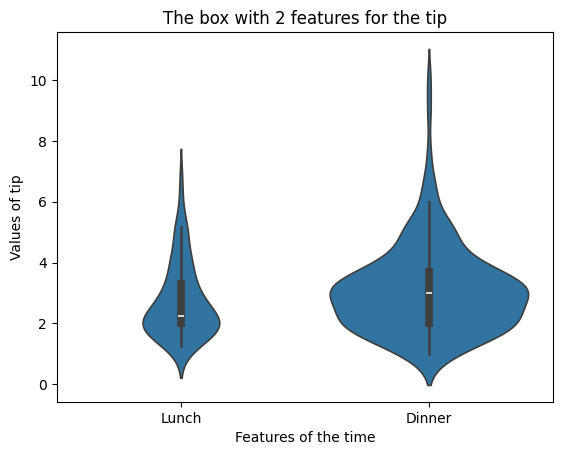

In [41]:
f=sns.violinplot(x="time", y="tip", scale="count", data=data);
f.set_xlabel('Features of the time');
f.set_ylabel('Values of tip');
f.set_title('The box with 2 features for the tip');

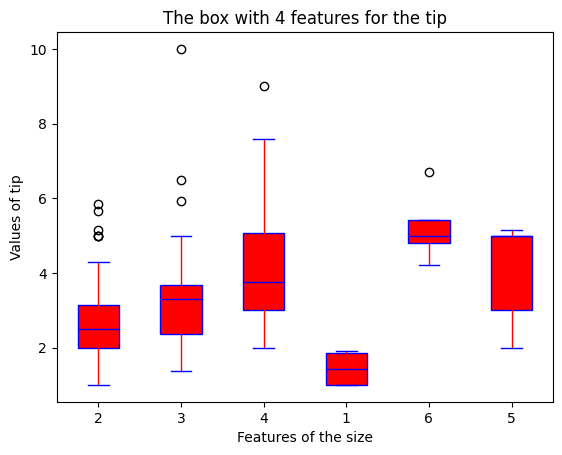

In [42]:
paras=data['size'].unique()
smoker_box = []
for para in paras:
    smoker_box.append(data[data['size']==para]['tip'].values.flatten())

_, ax = plt.subplots()
ax.boxplot(smoker_box, patch_artist = True
               , medianprops = {'color': 'b'}
               , boxprops = {'color': 'b', 'facecolor': 'r'}
               , whiskerprops = {'color': 'r'}
               , capprops = {'color': 'b'});
ax.set_xticklabels(paras)
ax.set_xlabel('Features of the size')
ax.set_ylabel('Values of tip')
ax.set_title('The box with 4 features for the tip');

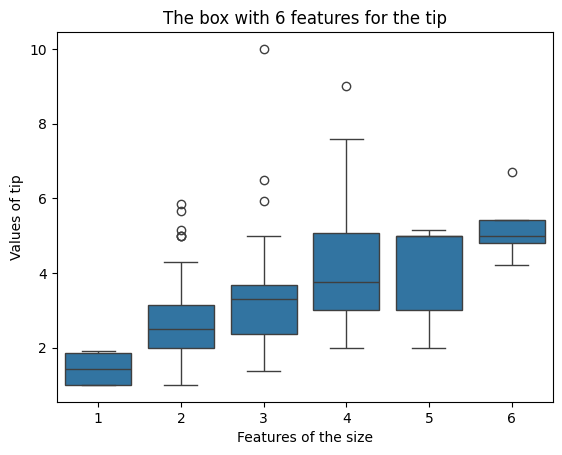

In [43]:
f=sns.boxplot(x="size", y="tip", data=data);
f.set_xlabel('Features of the size');
f.set_ylabel('Values of tip');
f.set_title('The box with 6 features for the tip');

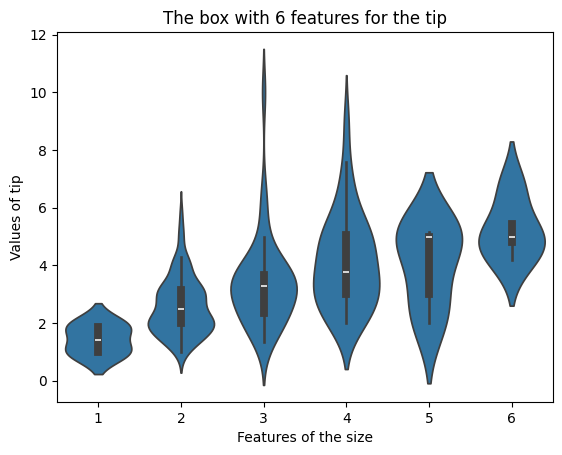

In [44]:
f=sns.violinplot(x="size", y="tip", scale="width", data=data);
f.set_xlabel('Features of the size');
f.set_ylabel('Values of tip');
f.set_title('The box with 6 features for the tip');

In [45]:
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title, xticklabel):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_xticks(x_data)
    ax.set_xticklabels(xticklabel)
    ax.set_title(title)
    ax.legend(loc = 'best')

In [46]:
groupdata=data[['sex','smoker','tip']].groupby(['smoker','sex']).mean()

In [47]:
groupdata.index.values

array([('Yes', 'Male'), ('Yes', 'Female'), ('No', 'Male'),
       ('No', 'Female')], dtype=object)

In [48]:
groupdata.iloc[0:2].values

array([[3.05116667],
       [2.93151515]])

In [49]:
groupdata

tip
smoker sex             
Yes    Male    3.051167
       Female  2.931515
No     Male    3.113402
       Female  2.773519

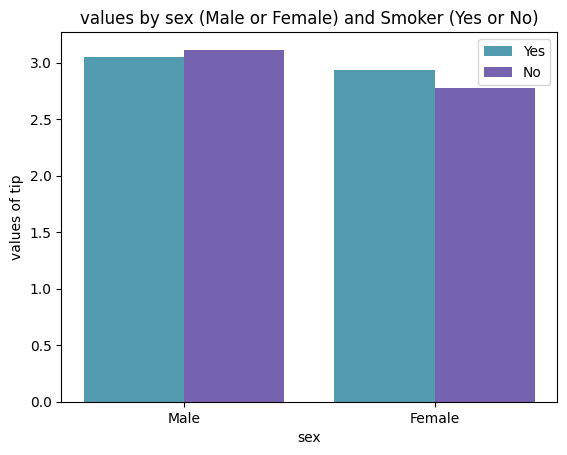

In [50]:
groupedbarplot(x_data = np.arange(1,3,1)
               , y_data_list = [groupdata.iloc[0:2].values.flatten(), groupdata.iloc[2:4].values.flatten()]
               , y_data_names = ['Yes', 'No']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'sex'
               , y_label = 'values of tip'
               , title = "values by sex (Male or Female) and Smoker (Yes or No)"
               , xticklabel=['Male','Female'])

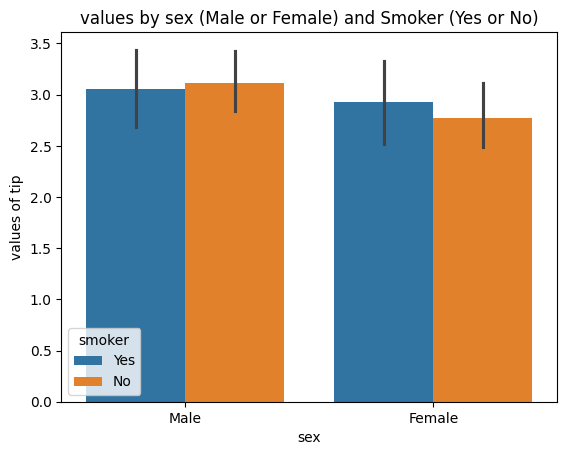

In [51]:
f=sns.barplot(x="sex", y="tip", hue="smoker", data=data);
f.set_ylabel("values of tip");
f.set_title("values by sex (Male or Female) and Smoker (Yes or No)");

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [52]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [53]:
data.groupby("pclass")[['survived']].sum()['survived']/data.groupby("pclass").size()

pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

In [54]:
data.groupby("pclass")[['survived']].sum()['survived']/data.groupby("pclass").size()

pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

In [55]:
ratepcl=pd.DataFrame({
    'survived': data.groupby("pclass")[['survived']].sum()['survived']/data.groupby("pclass").size(),
    'unsurvived': 1-data.groupby("pclass")[['survived']].sum()['survived']/data.groupby("pclass").size()   
})
ratepcl=ratepcl.reset_index()
ratepcl

,pclass,survived,unsurvived
0,1,0.629630,0.370370
1,2,0.472826,0.527174
2,3,0.242363,0.757637


In [56]:
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title, xticklabel):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1，下面bottom参数表示纵向从哪里开始画
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_xticks(x_data)
    ax.set_xticklabels(xticklabel)
    ax.set_title(title)
    ax.legend(loc = 'upper right') # 设定图例位置

In [57]:
ratepcl['pclass'].unique()

array([1, 2, 3])

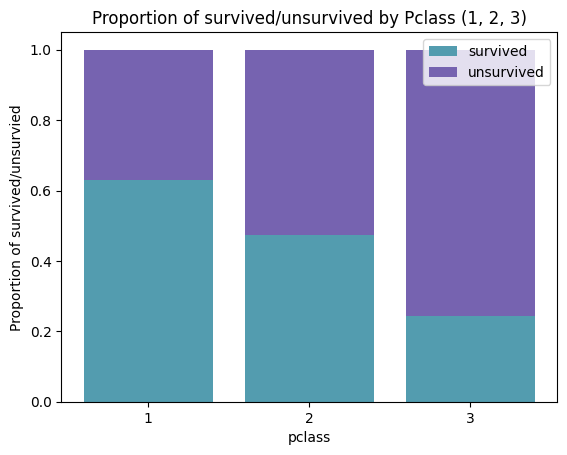

In [58]:
stackedbarplot(x_data=ratepcl['pclass'].unique()
               , y_data_list=[ratepcl['survived'],ratepcl['unsurvived']]
               , y_data_names=['survived','unsurvived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'pclass'
               , y_label = 'Proportion of survived/unsurvied'
               , title = 'Proportion of survived/unsurvived by Pclass (1, 2, 3)'
               , xticklabel=['1','2','3'])

<Axes: xlabel='pclass'>

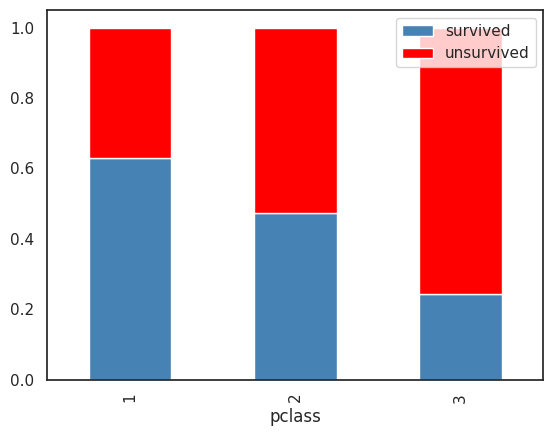

In [59]:
sns.set(style='white')
ratepcl.set_index('pclass').plot(kind='bar', stacked=True, color=['steelblue', 'red'])

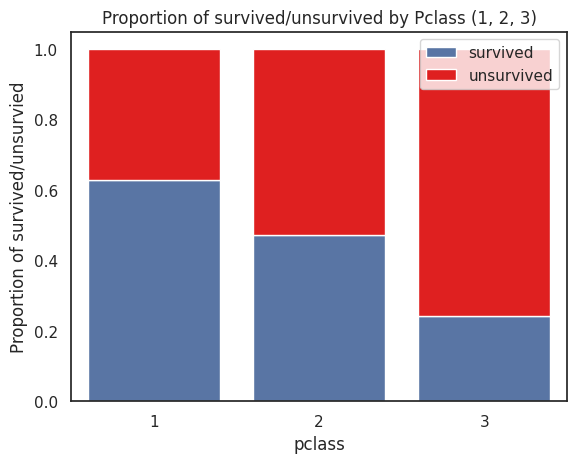

In [60]:
sns.barplot(x='pclass',y='survived',data=ratepcl, label='survived')
sns.barplot(x='pclass',y='unsurvived',data=ratepcl, color='red', bottom=ratepcl['survived'], label='unsurvived');
plt.title('Proportion of survived/unsurvived by Pclass (1, 2, 3)')
plt.ylabel('Proportion of survived/unsurvied')
plt.legend()

In [61]:
ratesex=pd.DataFrame({
    'survived': data.groupby("sex")[['survived']].sum()['survived']/data.groupby("sex").size(),
    'unsurvived': 1-data.groupby("sex")[['survived']].sum()['survived']/data.groupby("sex").size()   
})
ratesex=ratesex.reset_index()
ratesex

,sex,survived,unsurvived
0,female,0.742038,0.257962
1,male,0.188908,0.811092


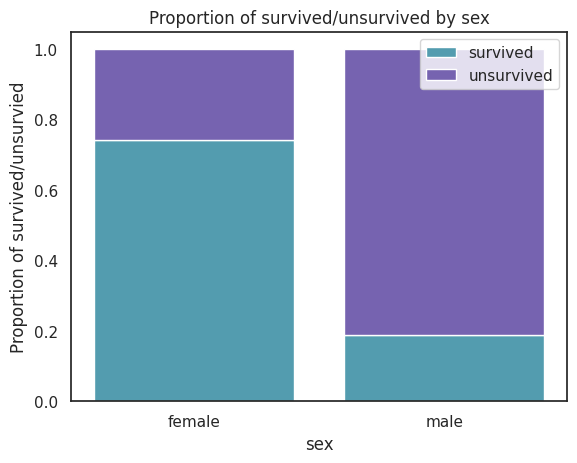

In [62]:
stackedbarplot(x_data=np.arange(0,2,1)
               , y_data_list=[ratesex['survived'],ratesex['unsurvived']]
               , y_data_names=['survived','unsurvived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'sex'
               , y_label = 'Proportion of survived/unsurvied'
               , title = 'Proportion of survived/unsurvived by sex'
               , xticklabel=['female','male'])

Text(0, 0.5, 'Proportion of survived/unsurvied')

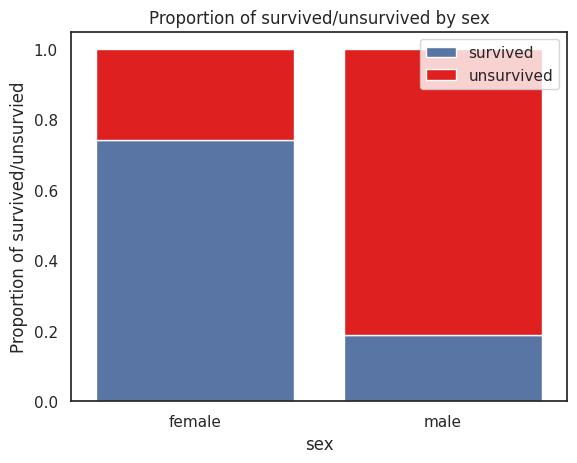

In [63]:
sns.barplot(x='sex',y='survived',data=ratesex, label='survived')
sns.barplot(x='sex',y='unsurvived',data=ratesex, color='red', bottom=ratesex['survived'], label='unsurvived');
plt.title('Proportion of survived/unsurvived by sex')
plt.ylabel('Proportion of survived/unsurvied')

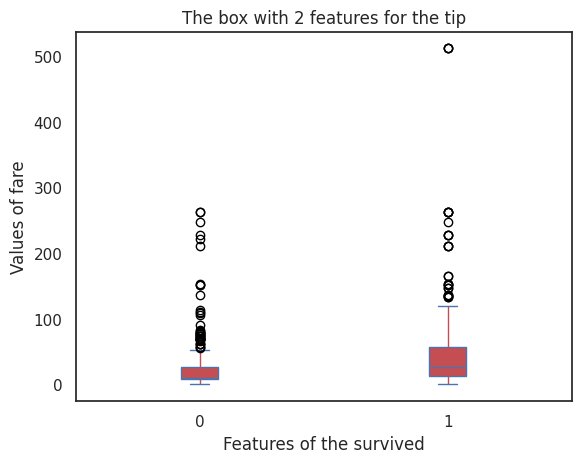

In [64]:
paras=data['survived'].unique()
fare_box = []
for para in paras:
    fare_box.append(data[data['survived']==para]['fare'].values.flatten())

_, ax = plt.subplots()
ax.boxplot(fare_box, patch_artist = True
               , medianprops = {'color': 'b'}
               , boxprops = {'color': 'b', 'facecolor': 'r'}
               , whiskerprops = {'color': 'r'}
               , capprops = {'color': 'b'});
ax.set_xticklabels(paras)
ax.set_xlabel('Features of the survived')
ax.set_ylabel('Values of fare')
ax.set_title('The box with 2 features for the tip');

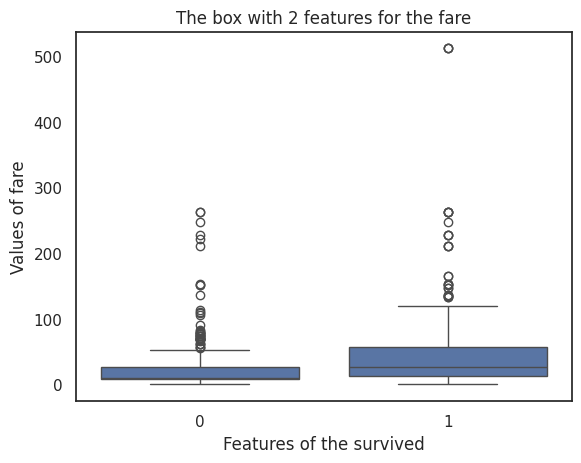

In [65]:
f=sns.boxplot(x="survived", y="fare", data=data);
f.set_xlabel('Features of the survived');
f.set_ylabel('Values of fare');
f.set_title('The box with 2 features for the fare');

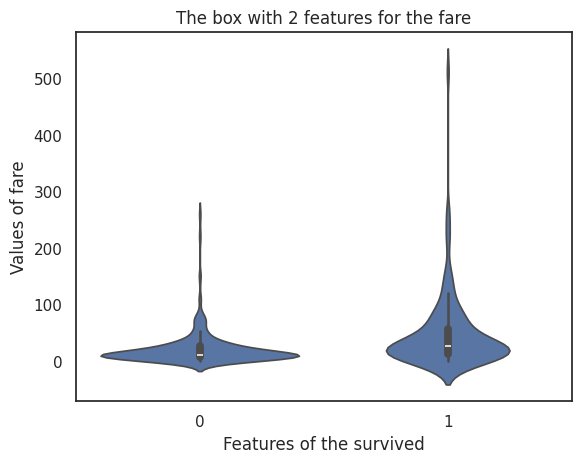

In [66]:
f=sns.violinplot(x="survived", y="fare", scale="count", data=data);
f.set_xlabel('Features of the survived');
f.set_ylabel('Values of fare');
f.set_title('The box with 2 features for the fare');

In [67]:
dataage=data[['survived','age']].dropna()

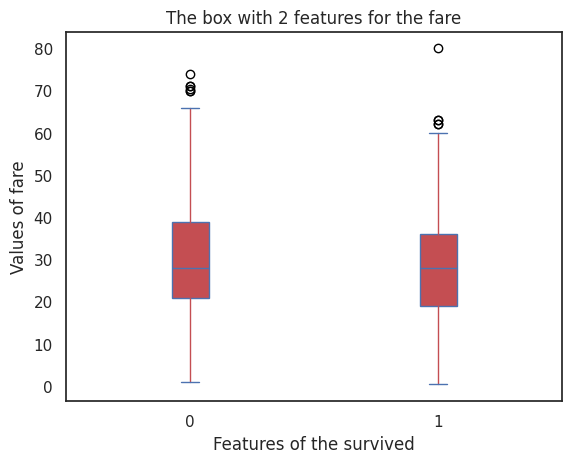

In [68]:
paras=data['survived'].unique()
age_box = []
for para in paras:
    age_box.append(dataage[dataage['survived']==para]['age'].values.flatten())

_, ax = plt.subplots()
ax.boxplot(age_box, patch_artist = True
               , medianprops = {'color': 'b'}
               , boxprops = {'color': 'b', 'facecolor': 'r'}
               , whiskerprops = {'color': 'r'}
               , capprops = {'color': 'b'});
ax.set_xticklabels(paras)
ax.set_xlabel('Features of the survived')
ax.set_ylabel('Values of fare')
ax.set_title('The box with 2 features for the fare');

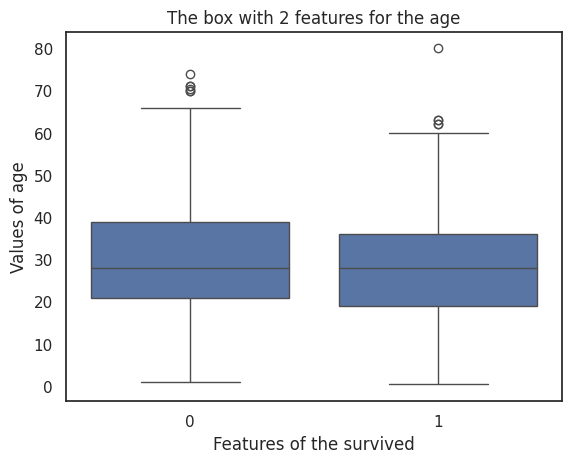

In [69]:
f=sns.boxplot(x="survived", y="age", data=data);
f.set_xlabel('Features of the survived');
f.set_ylabel('Values of age');
f.set_title('The box with 2 features for the age');

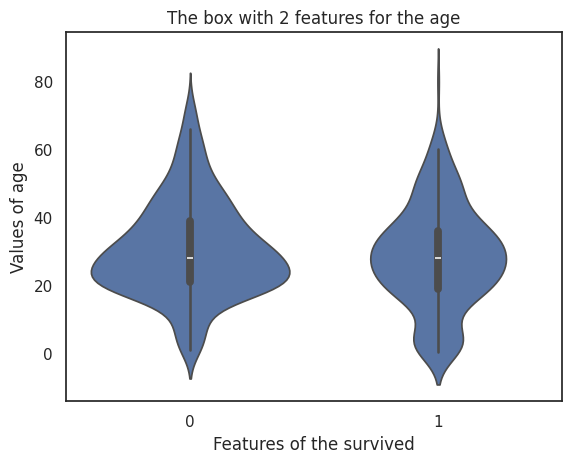

In [70]:
f=sns.violinplot(x="survived", y="age", scale="count", data=data);
f.set_xlabel('Features of the survived');
f.set_ylabel('Values of age');
f.set_title('The box with 2 features for the age');

In [71]:
data_pclass=data.groupby(["pclass","embarked"]).size().reset_index()
data_pclass

,pclass,embarked,0
0,1,C,85
1,1,Q,2
2,1,S,127
3,2,C,17
4,2,Q,3
5,2,S,164
6,3,C,66
7,3,Q,72
8,3,S,353


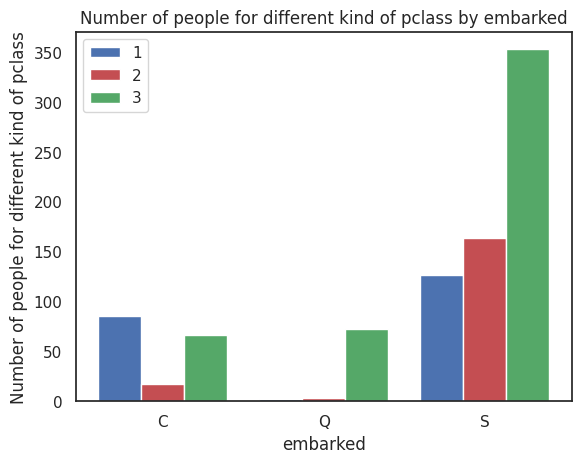

In [72]:
groupedbarplot(x_data = np.arange(0,3,1)
               , y_data_list = [data_pclass[data_pclass['pclass']==1][0], data_pclass[data_pclass['pclass']==2][0],data_pclass[data_pclass['pclass']==3][0]]
               , y_data_names = ['1', '2','3']
               , colors = ['b', 'r','g']
               , x_label = "embarked"
               , y_label = "Number of people for different kind of pclass"
               , title = "Number of people for different kind of pclass by embarked"
               , xticklabel=['C','Q','S'])

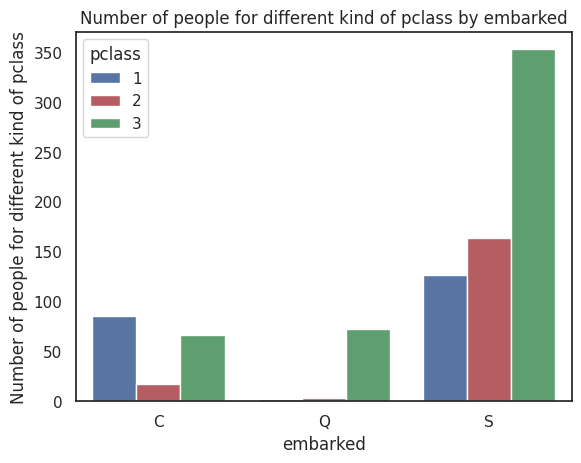

In [73]:
f=sns.barplot(x="embarked", y=0, hue="pclass", data=data.groupby(["pclass","embarked"]).size().reset_index(), palette=['b','r','g']);
f.set_ylabel("Number of people for different kind of pclass");
f.set_title("Number of people for different kind of pclass by embarked");

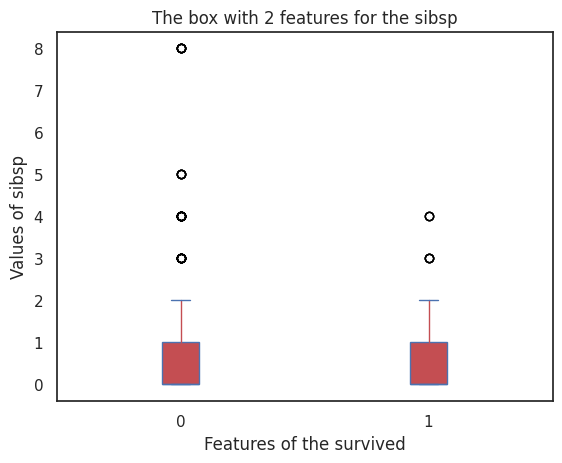

In [74]:
data_sib=data[['survived','sibsp']].dropna()
paras=data['survived'].unique()
sib_box = []
for para in paras:
    sib_box.append(data_sib[data_sib['survived']==para]['sibsp'].values.flatten())

_, ax = plt.subplots()
ax.boxplot(sib_box, patch_artist = True
               , medianprops = {'color': 'b'}
               , boxprops = {'color': 'b', 'facecolor': 'r'}
               , whiskerprops = {'color': 'r'}
               , capprops = {'color': 'b'});
ax.set_xticklabels(paras)
ax.set_xlabel('Features of the survived')
ax.set_ylabel('Values of sibsp')
ax.set_title('The box with 2 features for the sibsp');

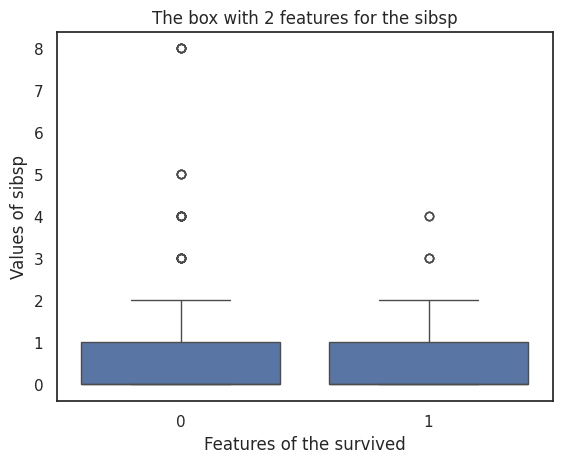

In [75]:
f=sns.boxplot(x="survived", y="sibsp", data=data);
f.set_xlabel('Features of the survived');
f.set_ylabel('Values of sibsp');
f.set_title('The box with 2 features for the sibsp');

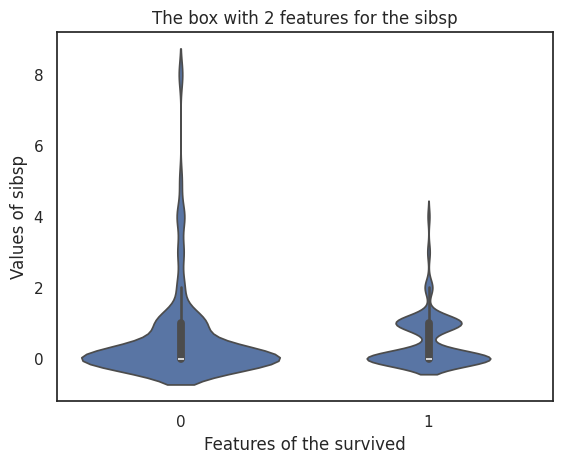

In [76]:
f=sns.violinplot(x="survived", y="sibsp", scale="count", data=data);
f.set_xlabel('Features of the survived');
f.set_ylabel('Values of sibsp');
f.set_title('The box with 2 features for the sibsp');

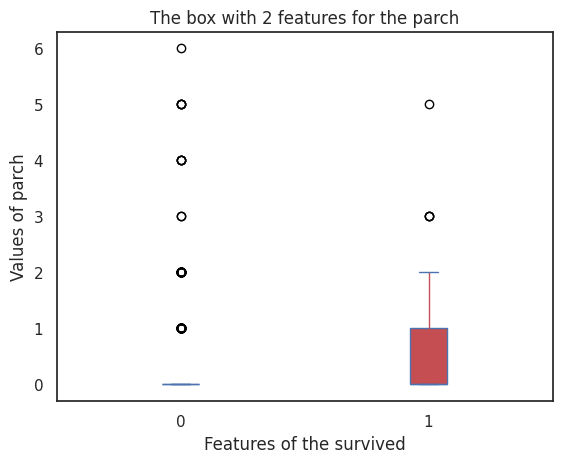

In [77]:
data_par=data[['survived','parch']].dropna()
paras=data['survived'].unique()
par_box = []
for para in paras:
    par_box.append(data_par[data_par['survived']==para]['parch'].values.flatten())

_, ax = plt.subplots()
ax.boxplot(par_box, patch_artist = True
               , medianprops = {'color': 'b'}
               , boxprops = {'color': 'b', 'facecolor': 'r'}
               , whiskerprops = {'color': 'r'}
               , capprops = {'color': 'b'});
ax.set_xticklabels(paras)
ax.set_xlabel('Features of the survived')
ax.set_ylabel('Values of parch')
ax.set_title('The box with 2 features for the parch');

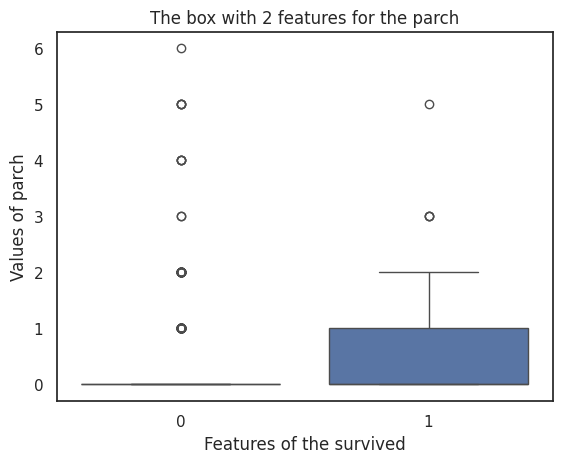

In [78]:
f=sns.boxplot(x="survived", y="parch", data=data);
f.set_xlabel('Features of the survived');
f.set_ylabel('Values of parch');
f.set_title('The box with 2 features for the parch');

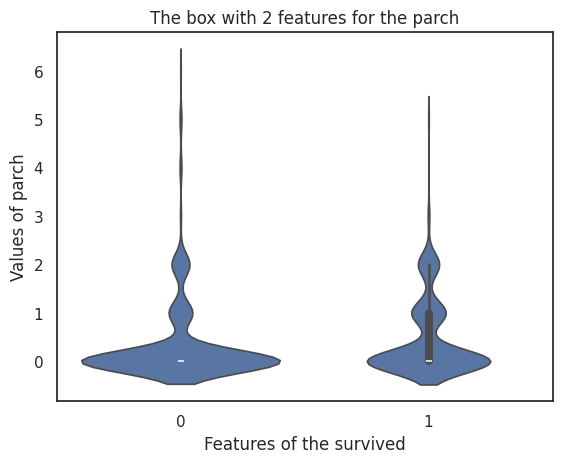

In [79]:
f=sns.violinplot(x="survived", y="parch", scale='count', data=data);
f.set_xlabel('Features of the survived');
f.set_ylabel('Values of parch');
f.set_title('The box with 2 features for the parch');

In [80]:
data_alone=data.groupby(["alone","survived"]).size().reset_index()
data_alone

,alone,survived,0
0,False,0,175
1,False,1,179
2,True,0,374
3,True,1,163


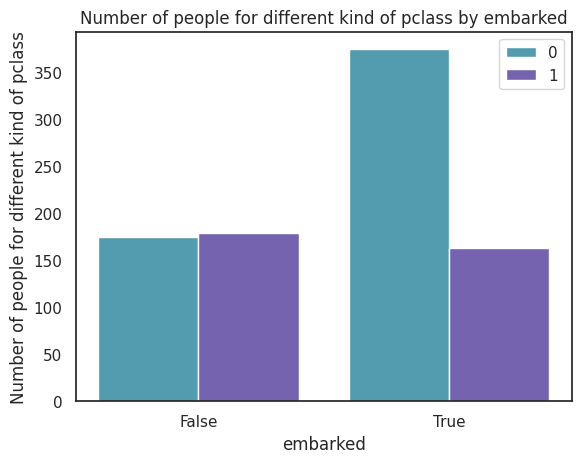

In [81]:
groupedbarplot(x_data = np.arange(0,2,1)
               , y_data_list = [data_alone[data_alone['survived']==0][0], data_alone[data_alone['survived']==1][0]]
               , y_data_names = ['0', '1']
               , colors = ['#539caf', '#7663b0']
               , x_label = "embarked"
               , y_label = "Number of people for different kind of pclass"
               , title = "Number of people for different kind of pclass by embarked"
               , xticklabel=['False', 'True'])

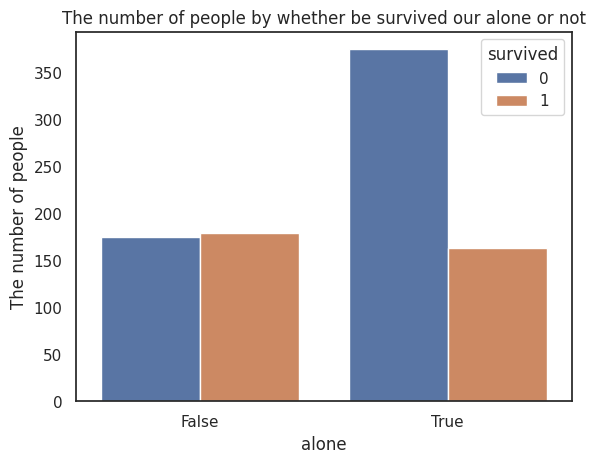

In [82]:
f=sns.barplot(x="alone", y=0, hue="survived", data=data.groupby(["alone","survived"]).size().reset_index());
f.set_ylabel("The number of people");
f.set_title("The number of people by whether be survived our alone or not");